<a href="https://colab.research.google.com/github/dolDolSee/TF2.0/blob/main/Dense_fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

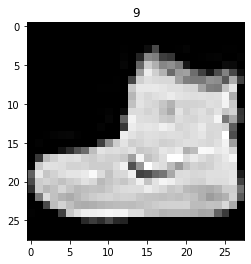

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [ ]:
train_images[0,:,:],train_labels[0]

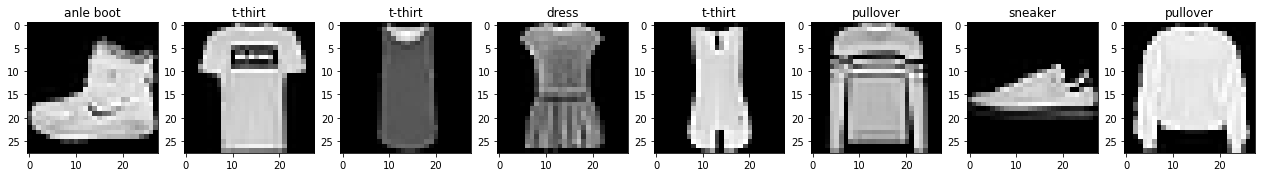

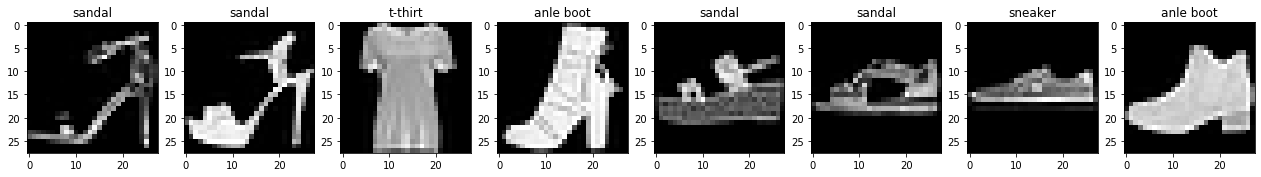

In [8]:
class_naems = ['t-thirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','anle boot']

def show_images(images,labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(class_naems[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [11]:
def get_preprocessed_data(images,labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)
  return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labes = get_preprocessed_data(test_images, test_labels)


In [37]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

INPUT_SIZE = 28
# model = tf.keras.models.Sequential([
#                     tf.keras.layers.Flatten(input_shape=(INPUT_SIZE,INPUT_SIZE)),
#                     tf.keras.layers.Dense(100, activation='relu'),
#                     tf.keras.layers.Dense(30, activation='relu'),
#                     tf.keras.layers.Dense(10, activation='softmax')
# ])

class MnistDense(tf.keras.Model):
  def __init__(self):
    super(MnistDense, self).__init__()
    
    self.flatten = tf.keras.layers.Flatten()
    self.hidden_layer1 = tf.keras.layers.Dense(100, activation="relu")
    self.hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
    self.hidden_layer3 = tf.keras.layers.Dense(10, activation="softmax")
    
  def call(self,x):
    flatten = self.flatten(x)
    H1_output = self.hidden_layer1(flatten)
    H2_output = self.hidden_layer2(H1_output)
    H3_output = self.hidden_layer3(H2_output)
    return H3_output


model = MnistDense()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [38]:
#categorical crossentropy는 꼭 one-hot encoding해주어야함.
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)


In [ ]:
history = model.fit(train_images, train_oh_labels, batch_size=32, epochs=20, verbose=1)

In [41]:
model.summary()

Model: "mnist_dense_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         multiple                  0         
_________________________________________________________________
dense_36 (Dense)             multiple                  78500     
_________________________________________________________________
dense_37 (Dense)             multiple                  3030      
_________________________________________________________________
dense_38 (Dense)             multiple                  310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [44]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5129585266113281, 0.3790605366230011, 0.3438369333744049, 0.31977200508117676, 0.3015734553337097, 0.28859743475914, 0.27736908197402954, 0.26463136076927185, 0.25535231828689575, 0.24812303483486176, 0.2395283728837967, 0.23324055969715118, 0.22501246631145477, 0.22011838853359222, 0.2148314267396927, 0.2088574767112732, 0.2031702995300293, 0.20174801349639893, 0.19346381723880768, 0.18811649084091187]
[0.820900022983551, 0.8635500073432922, 0.8752999901771545, 0.8823333382606506, 0.8883833289146423, 0.8936499953269958, 0.8976333141326904, 0.9003499746322632, 0.9047499895095825, 0.9063833355903625, 0.9108499884605408, 0.9128000140190125, 0.9159833192825317, 0.9170500040054321, 0.9191833138465881, 0.9212333559989929, 0.923633337020874, 0.9243333339691162, 0.9268500208854675, 0.9288666844367981]


In [45]:
test_images.shape

(10000, 28, 28)

In [46]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [50]:
#한개를 예측할 때 모델에서 3차원을 넣기 때문에 여기서도 차원을 하나 올려 3차원으로 넣어주어야함.
pred_proba = model.predict(np.expand_dims(test_images[0],axis=0))
print(pred_proba)
#위에서 예측을 위해 차원을 늘렸으니 이제 필요없어져서 squeeze해버림
pred = np.argmax(np.squeeze(pred_proba))
print(pred)

[[7.6899880e-08 3.2857738e-08 1.3789870e-07 7.0899714e-12 2.1818364e-08
  1.4957088e-07 4.9307789e-09 6.7624617e-03 1.0644505e-11 9.9323720e-01]]
9


In [51]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8872


[0.3570970296859741, 0.8871999979019165]

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
def get_preprocessed_data(images,labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)
  return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labes = get_preprocessed_data(test_images, test_labels)


4431872/4422102 [==============================] - 0s 0us/step


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

tr_images,val_images,tr_labels,val_labels = train_test_split(train_images,train_labels,test_size=0.15, random_state=2021)

tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

In [22]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

class DenseMnist(tf.keras.Model):
  def __init__(self):
    super(DenseMnist, self).__init__()
    self.flatten = tf.keras.layers.Flatten()
    self.Hidden_1 = tf.keras.layers.Dense(100, activation='relu')
    self.Hidden_2 = tf.keras.layers.Dense(30, activation='relu')
    self.Hidden_3 = tf.keras.layers.Dense(10, activation="softmax")


  def call(self, x):
    flatten = self.flatten(x)
    H1_output = self.Hidden_1(flatten)
    H2_output = self.Hidden_2(H1_output)
    H3_output = self.Hidden_3(H2_output)
    return H3_output

model = DenseMnist()
model.compile(optimizer = Adam(0.001), loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), epochs=5, verbose=1)

Epoch 1/5
399/399 [==============================] - 2s 5ms/step - loss: 0.5921 - accuracy: 0.8014 - val_loss: 0.4579 - val_accuracy: 0.8301
Epoch 2/5
399/399 [==============================] - 2s 4ms/step - loss: 0.4212 - accuracy: 0.8533 - val_loss: 0.4192 - val_accuracy: 0.8491
Epoch 3/5
399/399 [==============================] - 2s 4ms/step - loss: 0.3806 - accuracy: 0.8659 - val_loss: 0.3969 - val_accuracy: 0.8557
Epoch 4/5
399/399 [==============================] - 2s 4ms/step - loss: 0.3529 - accuracy: 0.8747 - val_loss: 0.3590 - val_accuracy: 0.8694
Epoch 5/5
399/399 [==============================] - 2s 4ms/step - loss: 0.3321 - accuracy: 0.8809 - val_loss: 0.3509 - val_accuracy: 0.8686


In [20]:
model.summary()

Model: "dense_mnist_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          multiple                  0         
_________________________________________________________________
dense_24 (Dense)             multiple                  78500     
_________________________________________________________________
dense_25 (Dense)             multiple                  3030      
_________________________________________________________________
dense_26 (Dense)             multiple                  310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


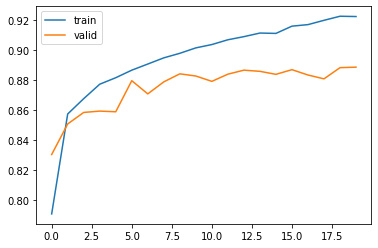

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label='valid')
plt.legend()

In [14]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
  input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
  x = Flatten()(input_tensor)
  x = Dense(100, activation='relu')(x)
  x = Dense(30, activation='relu')(x)
  output = Dense(10, activation='softmax')(x)

  model = Model(inputs=input_tensor, outputs=output)
  return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
def get_preprocessed_data(images, labels):
  images = np.array(images/255., dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels
def get_preprocessed_ohe(images,labels):
  images, labels = get_preprocessed_data(images,labels)
  oh_labels = to_categorical(labels)
  return images, oh_labels

def get_train_valid_test_set(train_images,train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
  train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
  test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

  tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)

  return (tr_images,tr_oh_labels),(val_images,val_oh_labels),(test_images, test_oh_labels)

In [11]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


In [12]:
(tr_images,tr_oh_labels),(val_images,val_oh_labels),(test_images, test_oh_labels)=get_train_valid_test_set(train_images,train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(0.001), loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), epochs=5, verbose=1)

Epoch 1/5
399/399 [==============================] - 5s 5ms/step - loss: 0.5964 - accuracy: 0.7981 - val_loss: 0.4540 - val_accuracy: 0.8408
Epoch 2/5
399/399 [==============================] - 2s 4ms/step - loss: 0.4133 - accuracy: 0.8554 - val_loss: 0.4131 - val_accuracy: 0.8488
Epoch 3/5
399/399 [==============================] - 2s 4ms/step - loss: 0.3729 - accuracy: 0.8681 - val_loss: 0.4060 - val_accuracy: 0.8523
Epoch 4/5
399/399 [==============================] - 1s 4ms/step - loss: 0.3479 - accuracy: 0.8755 - val_loss: 0.3523 - val_accuracy: 0.8748
Epoch 5/5
399/399 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8832 - val_loss: 0.3485 - val_accuracy: 0.8708


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
mcp_cb = ModelCheckpoint(filepath='./weights.{epoch:02d}--{val_loss:.2f}.hdf5',monitor='val_loss',save_best_only=True, save_weights_only=True,mode='min',period=3,verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), epochs=5, callbacks=[mcp_cb])

Epoch 1/5
399/399 [==============================] - 2s 4ms/step - loss: 0.3110 - accuracy: 0.8863 - val_loss: 0.3554 - val_accuracy: 0.8660
Epoch 2/5
399/399 [==============================] - 2s 4ms/step - loss: 0.2988 - accuracy: 0.8912 - val_loss: 0.3445 - val_accuracy: 0.8750
Epoch 3/5
399/399 [==============================] - 2s 4ms/step - loss: 0.2879 - accuracy: 0.8949 - val_loss: 0.3250 - val_accuracy: 0.8836

Epoch 00003: val_loss improved from inf to 0.32496, saving model to ./weights.03--0.32.hdf5
Epoch 4/5
399/399 [==============================] - 2s 4ms/step - loss: 0.2763 - accuracy: 0.8989 - val_loss: 0.3237 - val_accuracy: 0.8840
Epoch 5/5
399/399 [==============================] - 2s 4ms/step - loss: 0.2663 - accuracy: 0.9021 - val_loss: 0.3253 - val_accuracy: 0.8826


In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2610 - accuracy: 0.9040 - val_loss: 0.3239 - val_accuracy: 0.8861
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2526 - accuracy: 0.9078 - val_loss: 0.3054 - val_accuracy: 0.8892
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2440 - accuracy: 0.9098 - val_loss: 0.3362 - val_accuracy: 0.8811
Epoch 4/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2421 - accuracy: 0.9111 - val_loss: 0.3124 - val_accuracy: 0.8882
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2348 - accuracy: 0.9145 - val_loss: 0.3166 - val_accuracy: 0.8877

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2031 - accuracy: 0.9264 - val_loss: 0.2985 - val_accuracy: 0.8923
Epoch 7/30
399/399 [==============================] - 2s 4ms/step -

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='./weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
399/399 [==============================] - 2s 5ms/step - loss: 0.6074 - accuracy: 0.7962 - val_loss: 0.4526 - val_accuracy: 0.8377
Epoch 2/40
399/399 [==============================] - 2s 4ms/step - loss: 0.4100 - accuracy: 0.8560 - val_loss: 0.4014 - val_accuracy: 0.8568
Epoch 3/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3732 - accuracy: 0.8672 - val_loss: 0.3970 - val_accuracy: 0.8598
Epoch 4/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3485 - accuracy: 0.8747 - val_loss: 0.3761 - val_accuracy: 0.8623
Epoch 5/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3329 - accuracy: 0.8789 - val_loss: 0.3525 - val_accuracy: 0.8718
Epoch 6/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3145 - accuracy: 0.8868 - val_loss: 0.3637 - val_accuracy: 0.8684
Epoch 7/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3051 - accuracy: 0.8891 - val_loss: 0.3755 - val_accuracy: 0.8584
Epoch 